<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/FinalSubmissionNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [1728]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns # for the correlation matrix plot
import pydot
import pydotplus
import io
import cv2
from google.colab import files

uploaded = files.upload()
wdbcwh = pd.read_csv(io.BytesIO(uploaded['wdbcwh.csv']), header = 0)

Saving wdbcwh.csv to wdbcwh (19).csv


# Prepping and analyzing the data
In this section we prep and analyze the data we do this by dividing the data into two groups training and testing.  We will train the models with the training data so that we can predict the values within the testing dataset.  We randomize the data to produce a more accurate model and to show us the variation in performance of our models as the data is different everytime. We could also use a random seed to produce the same "random" set of rows everytime, although we wanted to avoid this to reduce our models bias towards the data when training and testing our models.

In [1797]:
# split data into training and test datasets
features = list(wdbcwh.columns[2:32])
X = wdbcwh[features]
y = wdbcwh['Diagnosis']
from sklearn.model_selection import train_test_split
# could use random state 42 for same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


Here we are showing some of the values in our training sets and our test sets, by doing this we can see that we have a decent amount of randomness in our data

In [1798]:
print('X_train ',X_train)
print('y_train ',y_train)
print('X_test ',X_test)
print('y_test ',y_test)

X_train       Mean_Radius  Mean_Texture  ...  Worst_Symmetry  Worst_Fractal_Dimension
216        11.89         18.35  ...          0.3397                  0.08365
211        11.84         18.94  ...          0.2535                  0.07993
274        17.93         24.48  ...          0.2504                  0.07948
514        15.05         19.07  ...          0.2282                  0.06954
561        11.20         29.37  ...          0.1566                  0.05905
..           ...           ...  ...             ...                      ...
189        12.30         15.90  ...          0.2482                  0.06306
295        13.77         13.27  ...          0.2823                  0.06794
351        15.75         19.22  ...          0.4245                  0.10500
99         14.42         19.77  ...          0.2718                  0.09353
254        19.45         19.33  ...          0.3379                  0.08950

[284 rows x 30 columns]
y_train  216    B
211    B
274    M
514   

We show the shape of our test and training sets here, when using different split values we will get differing results.  It is important to know the shape of our sets as we can reshape them if needed to fit our models

In [1799]:
# print test sets shape will be same as training sets shape
print('X_test set shape: ',X_test.shape)
print('y_test set shape: ',y_test.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_test set shape:  (285, 30)
y_test set shape:  (285,)
X_train shape:  (284, 30)
y_train shape:  (284,)


Here we are replacing diagnosis values with a 1 for malignant and a 0 for benign, we do this because it makes it easier to perform numerical calculations on the sets. 

In [1800]:
# Disabled pandas warning due to false positive
pd.options.mode.chained_assignment = None  # default='warn'


# Replace malignant with 1 and benign with 0
y_train = y_train.replace({'M':1,'B':0})
y_test = y_test.replace({'M':1,'B':0})
y = y.replace({'M':1,'B':0})
# resetting pandas warning
pd.options.mode.chained_assignment = 'warn'  # default='warn'


In [1801]:
y_train

216    0
211    0
274    1
514    1
561    0
      ..
189    0
295    0
351    1
99     1
254    1
Name: Diagnosis, Length: 284, dtype: int64

## Show standard deviation and variance between sets

Here we are showing both the standard deviation and variance of the sets, these are good methods for detecting outliers in our set, as we can see both sets have a somewhat high level of standard deviation.  We may try dropping columns from our dataframe to try and reduce this.  We can also see from these variables the amount of variation in certain features or throughout the overall dataset, these are useful metrics when training the models as we can ensure the models are trained with a large variety of different values.

Standard deviation is calculated by calculating the sum of each element in our data set then subtracting the population mean from the element and squaring we then divide by n and get the square root

Variance is calculated by essentially the same way but without getting the square root of our end result

In [1802]:
print('Standard deviation of values in x training set ',X_train.std())
print('Variance of diagnosis values in x training set: ', X_train.var())

Standard deviation of values in x training set  Mean_Radius                  3.599058
Mean_Texture                 4.227397
Mean_Perimeter              24.842203
Mean_Area                  358.136736
Mean_Smoothness              0.014743
Mean_Compactness             0.057329
Mean_Concavity               0.082921
Mean_Concave_Points          0.039797
Mean_Symmetry                0.028239
Mean_Fractal_Dimension       0.007530
Radius_SE                    0.274761
Texture_SE                   0.538102
Perimeter_SE                 2.022994
Area_SE                     43.664070
Smoothness_SE                0.003331
Compactness_SE               0.019683
Concavity_SE                 0.029447
Concave_Points_SE            0.006203
Symmetry_SE                  0.008528
Fractal_Dimension_SE         0.002615
Worst_Radius                 4.690153
Worst_Texture                6.058608
Worst_Perimeter             32.790410
Worst_Area                 528.701088
Worst_Smoothness             0.023953
Wo

In [1803]:

print('Standard deviation of values in y training set ',y_train.std())
print('Variance of values in y training set: ', y_train.var())

Standard deviation of values in y training set  0.48261468714333045
Variance of values in y training set:  0.23291693624645474


In [1804]:
print('Standard deviation of values in x testing set ',X_test.std())
print('Variance of values in x testing set: ', X_test.var())


Standard deviation of values in x testing set  Mean_Radius                  3.451653
Mean_Texture                 4.354425
Mean_Perimeter              23.772972
Mean_Area                  346.015851
Mean_Smoothness              0.013377
Mean_Compactness             0.047965
Mean_Concavity               0.076508
Mean_Concave_Points          0.037828
Mean_Symmetry                0.026594
Mean_Fractal_Dimension       0.006572
Radius_SE                    0.280314
Texture_SE                   0.565264
Perimeter_SE                 2.023955
Area_SE                     47.316717
Smoothness_SE                0.002631
Compactness_SE               0.015974
Concavity_SE                 0.030957
Concave_Points_SE            0.006148
Symmetry_SE                  0.008012
Fractal_Dimension_SE         0.002682
Worst_Radius                 4.979996
Worst_Texture                6.194700
Worst_Perimeter             34.450015
Worst_Area                 608.048797
Worst_Smoothness             0.021701
Wor

In [1805]:
print('Standard deviation of values in y testing set ',y_test.std())
print('Variance of values in y testing set: ', y_test.var())

Standard deviation of values in y testing set  0.48597833738064955
Variance of values in y testing set:  0.23617494440326045


## Show correlation
Here we are showing the correlation between each feature within the dataset.  Correlation is determined by analyzing the values of different features and comparing them with each other.  A 1 means that the values of the feature match exactly a value of -1 means that the values have very little in common.  It is important that we use a wide variety of features which have low correlation as it will yield more accurate results.  I have shown correlations of features for both the X and Y triaining and test sets.

### Training Set Correlation values

In [1806]:
# Show correlation of our training set
X_train.corr(method='pearson')

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Mean_Radius,1.000000,0.365502,0.997573,0.987592,0.178761,0.469600,0.682621,0.819949,0.167459,-0.318934,0.662250,-0.039195,0.658235,0.729938,-0.185987,0.185665,0.226264,0.352200,-0.073722,-0.030456,0.970612,0.316551,0.964906,0.956817,0.080700,0.372310,0.506639,0.727021,0.130579,-0.007436
Mean_Texture,0.365502,1.000000,0.373160,0.358193,-0.005655,0.275269,0.362599,0.337245,0.116522,-0.086698,0.294820,0.425397,0.299106,0.265879,0.027697,0.222687,0.223623,0.205205,0.018788,0.083810,0.393259,0.905759,0.403598,0.385030,0.086435,0.310555,0.356291,0.337844,0.137511,0.133300
Mean_Perimeter,0.997573,0.373160,1.000000,0.986496,0.218901,0.525241,0.725238,0.851044,0.208945,-0.265428,0.676710,-0.027268,0.677637,0.739727,-0.160616,0.233000,0.265007,0.384747,-0.042578,0.010494,0.971188,0.325091,0.970996,0.958046,0.117221,0.417848,0.546244,0.757060,0.162708,0.038775
Mean_Area,0.987592,0.358193,0.986496,1.000000,0.186239,0.464957,0.691839,0.823810,0.168617,-0.288403,0.712464,-0.015619,0.709203,0.787464,-0.128133,0.190890,0.237329,0.345792,-0.035589,-0.009179,0.957233,0.301210,0.952289,0.963954,0.085985,0.350382,0.490148,0.706365,0.113289,-0.008834
Mean_Smoothness,0.178761,-0.005655,0.218901,0.186239,1.000000,0.680521,0.549417,0.556470,0.567321,0.629093,0.274143,0.067895,0.274551,0.250033,0.322719,0.365764,0.315084,0.392022,0.242988,0.350310,0.212807,0.046171,0.239596,0.212460,0.813743,0.501247,0.471157,0.515525,0.437966,0.547290
Mean_Compactness,0.469600,0.275269,0.525241,0.464957,0.680521,1.000000,0.887407,0.823162,0.663282,0.599501,0.477173,0.091135,0.515803,0.438892,0.204820,0.750465,0.623815,0.621858,0.338675,0.561276,0.511426,0.281338,0.566697,0.499639,0.595429,0.865543,0.816750,0.809029,0.572155,0.705602
Mean_Concavity,0.682621,0.362599,0.725238,0.691839,0.549417,0.887407,1.000000,0.929767,0.538926,0.331539,0.616182,0.113126,0.637173,0.617852,0.154702,0.653058,0.706500,0.639479,0.248175,0.428465,0.699158,0.347177,0.737671,0.698000,0.472343,0.750449,0.882517,0.871129,0.442803,0.509442
Mean_Concave_Points,0.819949,0.337245,0.851044,0.823810,0.556470,0.823162,0.929767,1.000000,0.513124,0.176791,0.691129,0.061178,0.693895,0.697566,0.075790,0.491930,0.481352,0.598192,0.148633,0.290239,0.836354,0.317276,0.859375,0.833569,0.443578,0.653905,0.748241,0.908839,0.384914,0.378380
Mean_Symmetry,0.167459,0.116522,0.208945,0.168617,0.567321,0.663282,0.538926,0.513124,1.000000,0.509646,0.312840,0.139985,0.317298,0.243020,0.212385,0.481889,0.361482,0.412407,0.471967,0.360023,0.213546,0.126513,0.249520,0.208323,0.460005,0.531085,0.470905,0.479121,0.715806,0.478732
Mean_Fractal_Dimension,-0.318934,-0.086698,-0.265428,-0.288403,0.629093,0.599501,0.331539,0.176791,0.509646,1.000000,-0.009091,0.104696,0.014702,-0.091817,0.438580,0.555719,0.416122,0.315522,0.400247,0.675611,-0.258825,-0.049387,-0.211854,-0.237966,0.594749,0.496653,0.360660,0.199610,0.421977,0.773727


### Test set correlation values

In [1807]:
X_test.corr(method='pearson')

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Mean_Radius,1.000000,0.288416,0.998160,0.987103,0.160749,0.553469,0.670089,0.825111,0.127724,-0.303809,0.697234,-0.153594,0.692251,0.745042,-0.277200,0.232884,0.162876,0.401285,-0.138172,-0.055109,0.971586,0.284683,0.968202,0.935443,0.164415,0.467129,0.551024,0.763501,0.202450,0.025731
Mean_Texture,0.288416,1.000000,0.292195,0.290339,-0.040292,0.200379,0.245663,0.255719,0.021245,-0.066433,0.259922,0.348443,0.264682,0.255244,-0.009635,0.162644,0.070773,0.125719,-0.000966,0.027232,0.317731,0.916894,0.317684,0.310087,0.068859,0.243219,0.244105,0.254181,0.066158,0.100809
Mean_Perimeter,0.998160,0.292195,1.000000,0.986525,0.193527,0.598613,0.705815,0.850702,0.156148,-0.257448,0.708188,-0.144501,0.710842,0.753662,-0.264242,0.274713,0.191983,0.430858,-0.124902,-0.021842,0.970997,0.288167,0.972724,0.935370,0.189060,0.505721,0.585078,0.787419,0.220371,0.067189
Mean_Area,0.987103,0.290339,0.986525,1.000000,0.166168,0.542093,0.679494,0.822500,0.134001,-0.277733,0.753765,-0.114739,0.746012,0.815465,-0.222831,0.241234,0.178876,0.399866,-0.113005,-0.030729,0.970772,0.280795,0.968270,0.962995,0.166453,0.442352,0.539003,0.739411,0.178351,0.019938
Mean_Smoothness,0.160749,-0.040292,0.193527,0.166168,1.000000,0.632076,0.489097,0.550554,0.548268,0.529481,0.331954,0.070266,0.320954,0.245211,0.347098,0.256351,0.180057,0.368768,0.151575,0.213304,0.214815,0.028235,0.239548,0.204423,0.795277,0.436229,0.392326,0.490420,0.348688,0.441007
Mean_Compactness,0.553469,0.200379,0.598613,0.542093,0.632076,1.000000,0.879849,0.844681,0.530578,0.519517,0.526609,-0.002562,0.594096,0.482610,0.028214,0.721477,0.518188,0.671842,0.093236,0.450535,0.570423,0.218768,0.625511,0.533870,0.527570,0.867461,0.819029,0.830346,0.442803,0.665717
Mean_Concavity,0.670089,0.245663,0.705815,0.679494,0.489097,0.879849,1.000000,0.912035,0.458729,0.343809,0.650418,0.039995,0.687525,0.621531,0.020273,0.696094,0.678770,0.731903,0.097507,0.472692,0.680835,0.257148,0.724840,0.664045,0.421016,0.763519,0.887012,0.852343,0.376608,0.523902
Mean_Concave_Points,0.825111,0.255719,0.850702,0.822500,0.550554,0.844681,0.912035,1.000000,0.408463,0.155634,0.706439,-0.016398,0.730020,0.687025,-0.039175,0.491463,0.398348,0.634442,0.036048,0.224718,0.827463,0.275467,0.855458,0.796009,0.463980,0.688317,0.758651,0.913070,0.370056,0.359885
Mean_Symmetry,0.127724,0.021245,0.156148,0.134001,0.548268,0.530578,0.458729,0.408463,1.000000,0.444943,0.294431,0.114920,0.310165,0.206304,0.159656,0.347371,0.325157,0.373928,0.423712,0.303576,0.158838,0.049426,0.189218,0.149840,0.388302,0.401913,0.390855,0.377933,0.682401,0.389573
Mean_Fractal_Dimension,-0.303809,-0.066433,-0.257448,-0.277733,0.529481,0.519517,0.343809,0.155634,0.444943,1.000000,0.010418,0.230326,0.068658,-0.089547,0.351852,0.566767,0.483809,0.372301,0.278387,0.706791,-0.250697,-0.054502,-0.199724,-0.230255,0.391971,0.407698,0.328678,0.147831,0.233668,0.759529


## Heatmap of correlation in our dataset
As you can see from the legend the lighter the square the more highly correlated the feature data and the darker the square the less correlated.

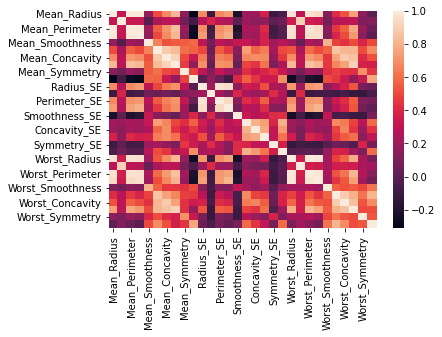

In [1808]:
# it computes the Pearson’s correlation coefficient.
corr_matrix = X.corr()
#The parameter ‘ annot=True ‘ displays the values of the correlation coefficient
#in each cell
sns.heatmap(corr_matrix, annot = False)
plt.show()


# Training the linear regression model

Here we are using linear regression to compare features in our model to see the correlation between them.  We are training this model to show us how dependent the variables are on one another.

# Creating linear regression model for Area Severity and Smoothness Severity
Here I have trained a model to show us the negative correlation between two features in our dataset, we can clearly see from this model that the Mean_Radius has a negative impact on the Mean_Fractal_Dimension.  When the smoothness severity value increases then on average the area severity value decreases and vice versa.

y test r^2 value:  1.0
mean_squared_error value:  0.0001318143267628611
Coefficient:  [[-0.00066728]]
Intercept:  [0.07227148]
predict  [[-0.03008877]]


(285,)

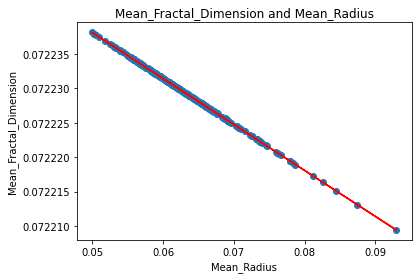

In [1809]:
# Here we train a model to perform linear regression data set to predict the diagnosis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from scipy import stats
# create the linear regression model by fitting training set to the test set
fractalDimensionArrayTest = np.array(X_test['Mean_Fractal_Dimension']).reshape(-1,1)
fractalDimensionArrayTrain = np.array(X_train['Mean_Fractal_Dimension']).reshape(-1,1)
X_trainArray = np.array(X_train['Mean_Radius']).reshape(-1,1)
X_testArray = np.array(X_test['Mean_Radius']).reshape(-1,1)
regression_model = LinearRegression().fit(X_trainArray, fractalDimensionArrayTrain)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(fractalDimensionArrayTest)
rSquared = regression_model.score(fractalDimensionArrayTest, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(fractalDimensionArrayTest, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)

plt.xlabel("Mean_Radius")
plt.ylabel("Mean_Fractal_Dimension")
plt.title('Mean_Fractal_Dimension and Mean_Radius')
plt.scatter(fractalDimensionArrayTest,y_pred)
plt.plot(fractalDimensionArrayTest,y_pred,c='r')
print('predict ',regression_model.predict([[153.4]]))
y_test.shape


I will demonstrate with some predictions below that the values are negatively skewed.  We will see that whenever we pass in a high fractal dimension the value will be lower and vice versa.  We can also see there is a low mean square error and a negative coefficient.  Since our coefficient is negative we will see that negative values will produce higher values for our dependent variable where as higher values will produce low values for our dependent variable

In [1810]:
# As we can see not too much of a difference between the values here
print('this value will be low: ', regression_model.predict([[0.5]]))
print('this value will be high: ', regression_model.predict([[0.1]]))

# just to make our example clearer let's use ridiculously inflated values  
print('let\'s make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another')
print('this value will be low: ', regression_model.predict([[100]]))
# I use a negative value here to demonstrate the radius the higher the mean fractal dimension
print('this value will be high: ', regression_model.predict([[-100]]))


this value will be low:  [[0.07193784]]
this value will be high:  [[0.07220475]]
let's make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another
this value will be low:  [[0.00554381]]
this value will be high:  [[0.13899914]]


As we can see above that whenever I make the value of the mean fractal dimension higher then the value of our dependent variable will decrease, whenever I make it lower it will increase.  We can also see that the values don't have too much of an effect on each other this is because the negative correlation is around ~ -0.29

# Positive correlation
Here we compare the concave points severity with the concavity severity, we see that there is a positive linear correlation between the two variables, we also see that the R^2 value is one which indicates a possible overfitting of our model.  We can see clearly from this graph that the two variables have a high correlation and that if the value increases in one of the variables then we can predict that the other variable also increases

y test r^2 value:  1.0
mean_squared_error value:  3.6344280638832536e-05
Coefficient:  [[0.15769219]]
Intercept:  [0.00679588]


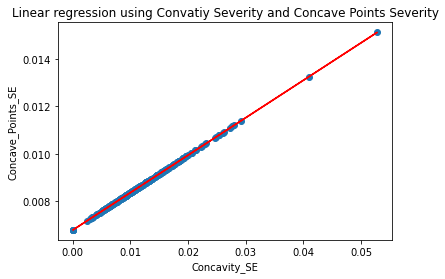

In [1811]:
# create the linear regression model by fitting training set to the test set
concavePointsSeverityArrayTest = np.array(X_test['Concave_Points_SE']).reshape(-1,1)
concavePointsSeverityArrayTrain = np.array(X_train['Concave_Points_SE']).reshape(-1,1)
X_trainArray = np.array(X_train['Concavity_SE']).reshape(-1,1)
X_testArray = np.array(X_test['Concavity_SE']).reshape(-1,1)
# here we need to reshape the data using numpy so that the training data matches the testdata
regression_model = LinearRegression().fit(X_trainArray, concavePointsSeverityArrayTrain)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(concavePointsSeverityArrayTest)
rSquared = regression_model.score(concavePointsSeverityArrayTest, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(concavePointsSeverityArrayTest, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)
plt.xlabel("Concavity_SE")
plt.ylabel("Concave_Points_SE")
plt.title('Linear regression using Convatiy Severity and Concave Points Severity')
plt.scatter(concavePointsSeverityArrayTest,y_pred)
plt.plot(concavePointsSeverityArrayTest,y_pred,c='r')

We can see here there is a positive coefficient which is the amount we expect the value to increase by when making a prediction, we can also see that there is a low mean squared error value this indicates the performance of the model and the distance away the points are from our line

Below we see the second models features have on one another, we can clearly see that the data has a positive correlation from our graph but let's show some concrete examples and perform some predictions using it.

In [1812]:
print('this value will be high: ', regression_model.predict([[0.5]]))
print('this value will be low: ', regression_model.predict([[0.1]]))

# just to show how high the impact will be with grossly inflated / deflated values values

print('let\'s make our model predict some grossly inflated / deflated values to show severity of impact')
print('this value will be high: ', regression_model.predict([[100]]))
print('this value will be low: ', regression_model.predict([[0.0000000001]]))


this value will be high:  [[0.08564198]]
this value will be low:  [[0.0225651]]
let's make our model predict some grossly inflated / deflated values to show severity of impact
this value will be high:  [[15.77601453]]
this value will be low:  [[0.00679588]]


Since the above values are highly correlated we see a greater rise and decrease in the predicted values when predicting than we did in the first linear regression model.  This is due to the fact that these two variables have a positive correlation of 0.776207, the features we used in our first model have a lower negative correlation which is why we don't see as much of an impact on them.  If they had a negative correlation of 0.776207 we would see the same rise and decrease in the first linear regression models predicted valules as well

# Examples of low and high correlation in our dataset

Additionally we can see here the Mean Perimeter has a positive correlation with our Mean Radius feature.  Below this image we can see an example of low negative correlation, these variables don't really impact each other much

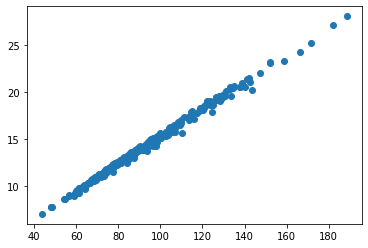

In [1813]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(X_train['Mean_Perimeter'],X_train['Mean_Radius'])


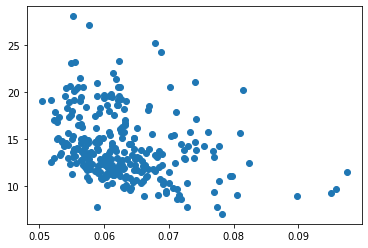

In [1814]:
# example of low negative correlation
plt.scatter(X_train['Mean_Fractal_Dimension'],X_train['Mean_Radius'])


In [1815]:
def predictValues(realValues,predictedValues):
  correct = 0;
  count = 0;
  actualValues = np.array(realValues).reshape(-1,1)
  for i in realValues:
    print('Actual: ', realValues[count], ' Predicted: ', predictedValues[count])
    if predictedValues[count] == realValues[count]:
      correct+=1
    count+=1
  print('Total values: ',count, ' correctly predicted values: ',correct)

In [1816]:
def predictKnnValues(realValues,predictedValues):
  correct = 0;
  count = 0;
  actualValues = np.array(realValues).reshape(-1,1)
  for i in realValues:
    print('Actual: ', realValues[count], ' Predicted: ', predictedValues[count])
    if predictedValues[count] == realValues[count]:
      correct+=1
    count+=1
  print('Total values: ',count, ' correctly predicted values: ',correct)

# KNN Predictions

Here we are using KNN to make predictions based on a number of features fed into the model.  As we can see it's score is 0.96 which isn't perfect but it's better to avoid overfitting the model so that it can adapt to new data

In [1817]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
y_trainArray = np.array(y_train).reshape(-1,1)
y_testArray = np.array(y_test).reshape(-1,1)

knn = KNeighborsClassifier(n_neighbors=55)
knn.fit(X_train,y_train)
print('Performance of model: ',knn.score(X,y))


Performance of model:  0.8945518453427065


In [1818]:
# Make prediction on testSet
predictValues(y,knn.predict(X))

Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  

# Naive Bayes prediction of diagnosis

Here we use naive bayes on both sets to perform  the diagnosis based on features from the dataset, I chose to input a large number of features into this model as generally this algorithm performs better when fitted with more features, in Naive Bayes the weights of the features have no bearing on the output.  The model below is underfitted it appears 

## References

Sklearn documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

You may also notice we are using a particular kind of Naive Bayes called Gaussian Naive Bayes for this model.  We chose to include this version of Naive Bayes due to it's ability to handle continuous data. The algorithm also has the advantage of speed and is frequently used in email spam classifiers.  The algorithm works by assuming that the continuous values across the features are normally distributed in a Gaussian fashion(think of a bell curve!)

In [1850]:

from sklearn.naive_bayes import GaussianNB
yTestArray = np.array(y_test).reshape(-1,1)
y_trainArray = np.array(y_train).reshape(-1,1)
naive_bayes = GaussianNB()
y_train_pred = naive_bayes.fit(X_train[['Mean_Radius',	'Mean_Texture',	'Mean_Perimeter',	'Mean_Area',	'Mean_Smoothness',	'Mean_Compactness',	'Mean_Concavity',	'Mean_Concave_Points',	'Mean_Symmetry',	'Mean_Fractal_Dimension',	'Radius_SE',	'Texture_SE',	'Perimeter_SE',	'Area_SE',	'Smoothness_SE',	'Compactness_SE',	'Concavity_SE',	'Concave_Points_SE',	'Symmetry_SE'	,'Fractal_Dimension_SE',	'Worst_Radius','Worst_Texture'	,'Worst_Perimeter',	'Worst_Area',	'Worst_Smoothness'	,'Worst_Compactness'	,'Worst_Concavity'	,'Worst_Concave_Points'	,'Worst_Symmetry'	,'Worst_Fractal_Dimension']],y_train).predict(y_trainArray)
y_pred = naive_bayes.fit(X_train[['Mean_Radius',	'Mean_Texture',	'Mean_Perimeter',	'Mean_Area',	'Mean_Smoothness',	'Mean_Compactness',	'Mean_Concavity',	'Mean_Concave_Points'	,'Mean_Symmetry',	'Mean_Fractal_Dimension',	'Radius_SE'	,'Texture_SE',	'Perimeter_SE',	'Area_SE',	'Smoothness_SE'	,'Compactness_SE'	,'Concavity_SE'	,'Concave_Points_SE'	,'Symmetry_SE'	,'Fractal_Dimension_SE'	,'Worst_Radius'	,'Worst_Texture'	,'Worst_Perimeter'	,'Worst_Area'	,'Worst_Smoothness',	'Worst_Compactness',	'Worst_Concavity',	'Worst_Concave_Points',	'Worst_Symmetry'	,'Worst_Fractal_Dimension']],y_train).predict(yTestArray)


In [1851]:
predictValues(yTestArray,y_pred)
predictValues(y_trainArray,y_train_pred)


Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predic

# Decision Trees

In [1706]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


Training the first default tree model

In [1707]:
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#clf = clf.fit (X,y)


In [1708]:
print(y_test.shape,y_train.shape,X_train.shape,X_test.shape)

(171,) (398,) (398, 30) (171, 30)


Here we display the tree

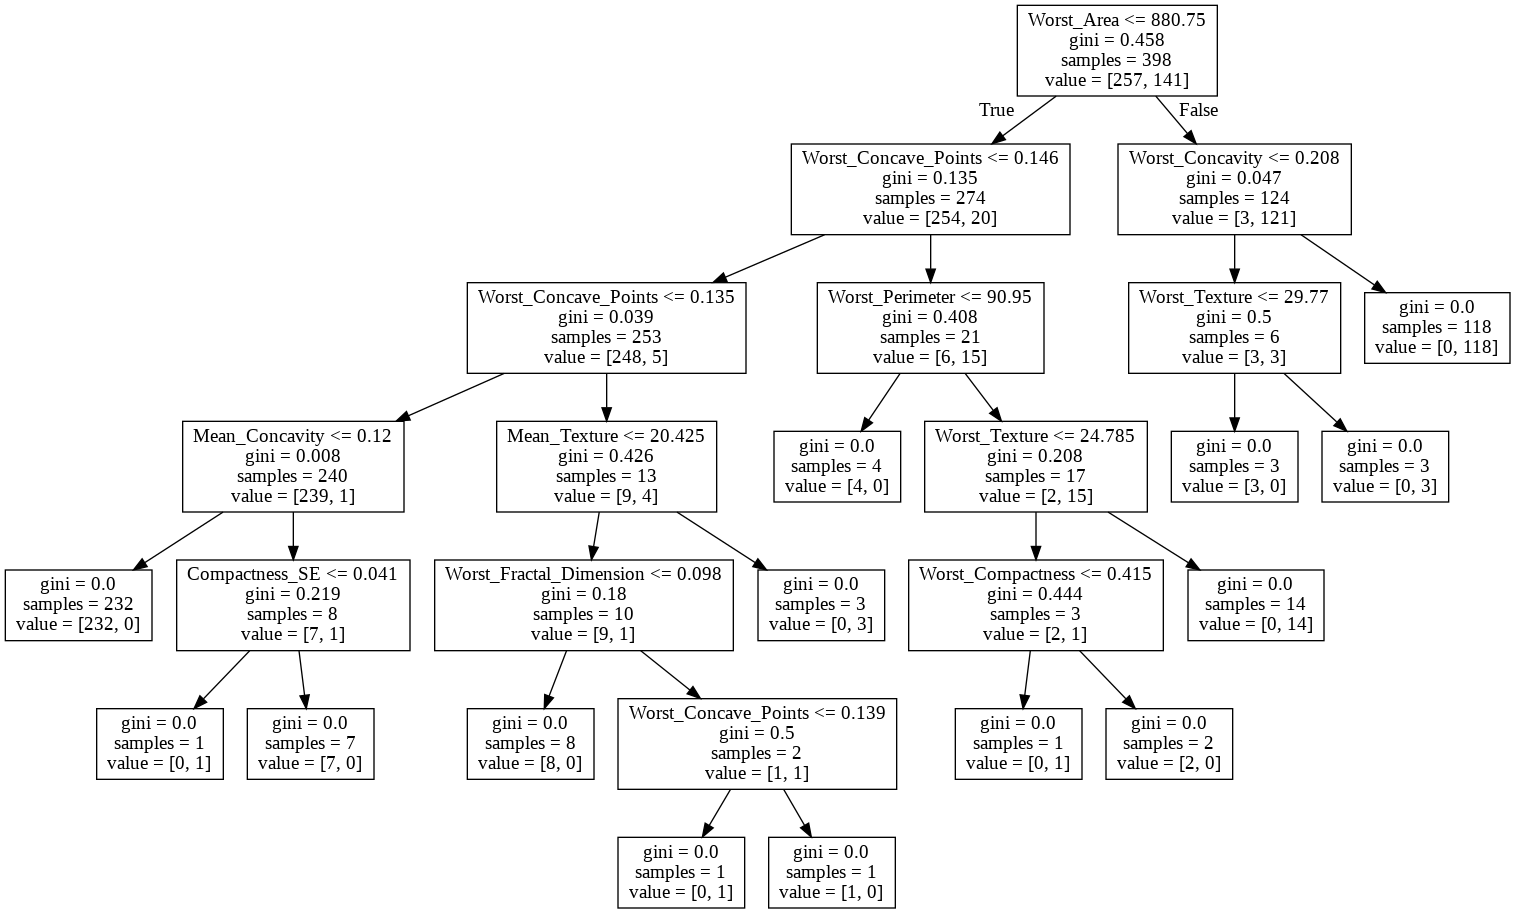

In [1709]:
from IPython.display import Image
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

The predicticton result for head data, this should really be fresh data not reusing training data



In [1710]:
#When we use our training data above we should use our validation data here to test the predictions
print("Making predictions for the following 5 patients:")
print(X_test)
print("The predictions are")
print(clf.predict(X_test))

Making predictions for the following 5 patients:
     Mean_Radius  Mean_Texture  ...  Worst_Symmetry  Worst_Fractal_Dimension
101        6.981         13.43  ...          0.2932                  0.09382
126       13.610         24.69  ...          0.3470                  0.07900
410       11.360         17.57  ...          0.2973                  0.07745
444       18.030         16.85  ...          0.2842                  0.08225
521       24.630         21.60  ...          0.3157                  0.09671
..           ...           ...  ...             ...                      ...
406       16.140         14.86  ...          0.2778                  0.07012
436       12.870         19.54  ...          0.3313                  0.07735
347       14.760         14.74  ...          0.3109                  0.08187
446       17.750         28.03  ...          0.2972                  0.09075
31        11.840         18.70  ...          0.4761                  0.14020

[171 rows x 30 columns]
Th

Desicion tree test results



In [1711]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0
 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1]
Accuracy: 0.9064327485380117


Random forest

In [1712]:

from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=10)
rfclf = rfclf.fit(X,y)
#Predict result from the data given
y_pred=rfclf.predict(X_test)
print(y_pred)

#Test Random forrrest accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0
 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
Accuracy: 0.9883040935672515


So we can see that the Random forrest is more accurate

We also explored the alternative to the decision tree using entropy criterion rather than the default gini



In [1713]:

entclf = tree.DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
entclf = entclf.fit(X_train,y_train)

Display the entropy tree



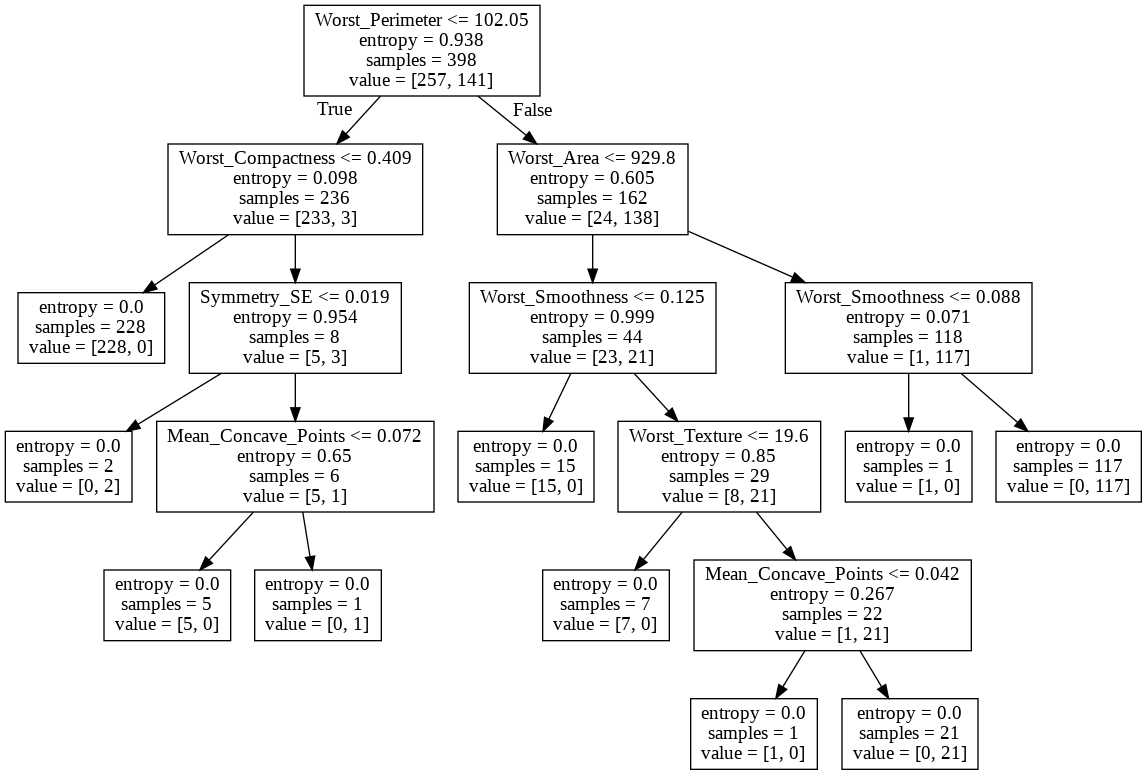

In [1714]:
from IPython.display import Image
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(entclf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

entropy tree results

In [1715]:

#Predict the response for test dataset
y_pred = entclf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1]
Accuracy: 0.9181286549707602


Random Entropy forrest

In [1716]:

rfentclf = RandomForestClassifier(criterion="entropy",n_estimators=10)
rfentclf = rfentclf.fit(X_train,y_train)
#Predict result from the data given
y_pred=rfentclf.predict(X_test)
print(y_pred)

#Test Random forrrest accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1]
Accuracy: 0.9415204678362573


testing via crossvalidation



In [1717]:
from sklearn.model_selection import cross_val_score
np.random.seed(1)
scores = cross_val_score(clf, X, y)
print('gini tree accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
scores = cross_val_score(rfclf, X, y)
print('gini random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
scores = cross_val_score(entclf, X, y)
print('entropy accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
scores = cross_val_score(rfentclf, X, y)
print('entropy random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))


gini tree accuracy = 0.9121099208197485 +/- 0.011235106844788624
gini random forest accuracy = 0.9525694767893185 +/- 0.016223037334090338
entropy accuracy = 0.9331936034777207 +/- 0.01540870493426004
entropy random forest accuracy = 0.9525384257102936 +/- 0.018922161707975938


Creating the Model For DecisionTreeRegression() (Problematic due to M/B classification rather than a series of numeric variables, may not be a viable model for this data)